# Main Library

In [1]:
# Reading Data
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import np_utils
import cv2

# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, AveragePooling2D, Flatten

# Download Model
import pickle

## Reading Data 

### And Make Augmantation

In [2]:
data_Aug = tf.keras.Sequential([
        k.layers.RandomFlip("horizontal", (128, 128, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
        ])

In [3]:
path_file = r"D:\Project - Attend     (DL - CV - ML)"
class_name = os.listdir(path_file)

images = []
label_image = []

count = 0
for path in os.listdir(path_file):
    input_image = os.listdir(path_file + "\\" + path)
    print("Loading Image -- ", path)
    for img in input_image:
        image = cv2.imread(path_file + "\\" + path + "\\" + img)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        label_image.append(count)
        for i in range(100):
            new_img = data_Aug(tf.expand_dims(image, 0))[0]
            images.append(new_img)
            label_image.append(count)
        count += 1
            
print(count)

Loading Image --  Version-1


KeyboardInterrupt: 

In [4]:
len(label_image), class_name

(6565, ['Marwan', 'mostafa', 'Osama'])

In [5]:
data = np.array(images)
data = data.astype("float32")
data = data / 255.0

data.shape

(6565, 128, 128, 3)

In [6]:
y_output = np_utils.to_categorical(label_image, len(class_name))
y_output[0]

array([1., 0., 0.], dtype=float32)

In [7]:
x_img, y_img = shuffle(data, y_output, random_state=2)

x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.7, random_state=42)

## Visualization Some Photo

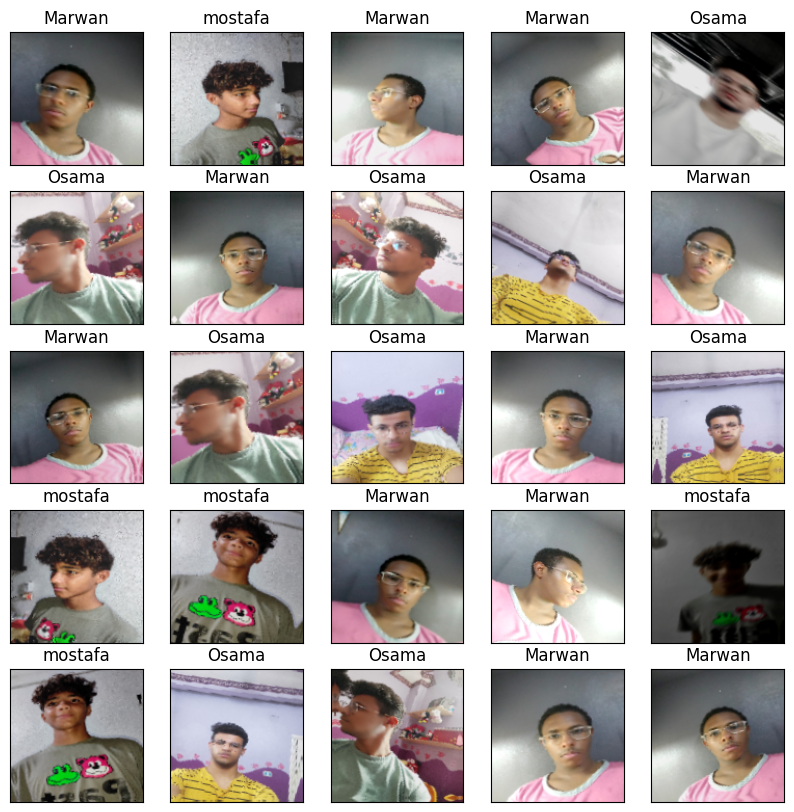

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    image = cv2.cvtColor(x_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(class_name[np.argmax(y_train[i])])
    

# Building Model From Scratch CNN

In [34]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(128, 128, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="tanh",  padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (4, 4), activation="relu", padding="valid"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))


model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
model.add(k.layers.Dropout(0.4))

model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 16)      1216      
                                                                 
 average_pooling2d_12 (Aver  (None, 64, 64, 16)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        8224      
                                                                 
 average_pooling2d_13 (Aver  (None, 32, 32, 32)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

In [35]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), validation_split=0.3)

Epoch 1/5
144/144 [==============================] - 27s 180ms/step - loss: 0.3948 - accuracy: 0.8231 - val_loss: 0.3049 - val_accuracy: 0.9244
Epoch 2/5
144/144 [==============================] - 26s 178ms/step - loss: 0.0684 - accuracy: 0.9778 - val_loss: 0.0330 - val_accuracy: 0.9939
Epoch 3/5
144/144 [==============================] - 26s 179ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0033 - val_accuracy: 0.9985
Epoch 4/5
144/144 [==============================] - 26s 179ms/step - loss: 0.0289 - accuracy: 0.9919 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 5/5
144/144 [==============================] - 26s 178ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9995


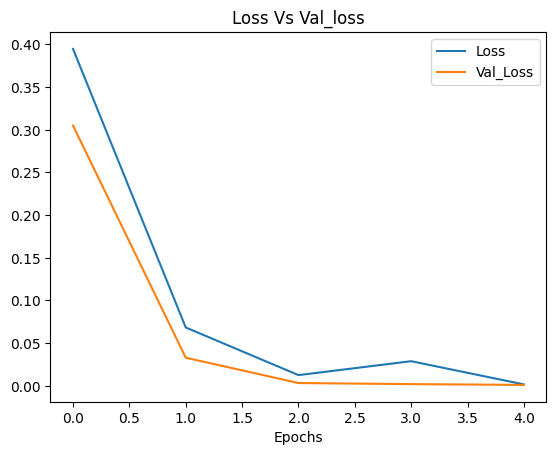

In [36]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.title("Loss Vs Val_loss")
plt.legend()
plt.xlabel("Epochs")
plt.show()

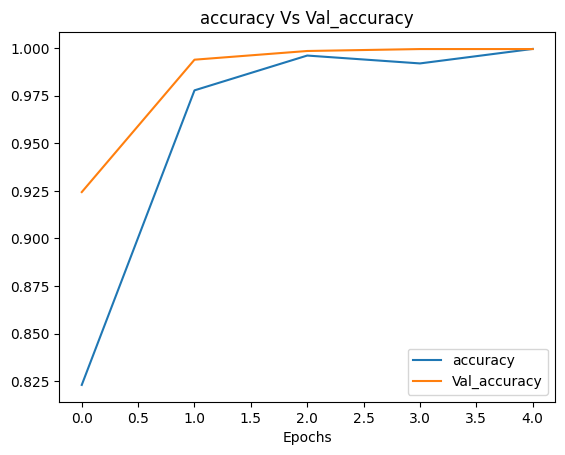

In [37]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="Val_accuracy")

plt.title("accuracy Vs Val_accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.show()

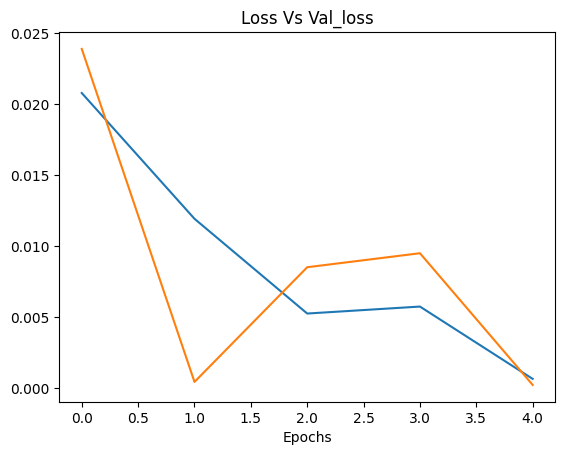

In [39]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.title("Loss Vs Val_loss")
plt.xlabel("Epochs")
plt.show()

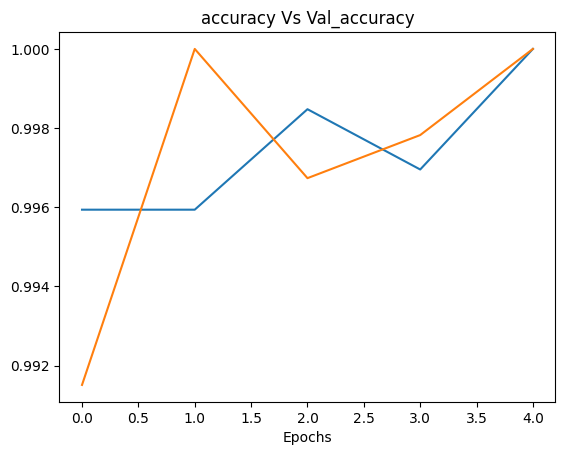

In [40]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="Val_accuracy")

plt.title("accuracy Vs Val_accuracy")
plt.xlabel("Epochs")
plt.show()

In [42]:
loss, acc = model.evaluate(x_test, y_test)
print("The Accuracy Testing is ", {round(acc, 3) * 100})
print("The loss Testing is ", {round(loss, 3) *100})

62/62 [==============================] - 2s 34ms/step - loss: 5.8370e-05 - accuracy: 1.0000
The Accuracy Testing is  {100.0}
The loss Testing is  {0.0}


In [61]:
pickle.dump(model, open("D:\Pycharm\model_pickle\DL - Presence and absence Model (experimental).bin", "wb"))

In [62]:
model = pickle.load(open("D:\Pycharm\model_pickle\DL - Presence and absence Model (experimental).bin", "rb"))

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------

In [45]:
class_name = ["Marwan", "Mostafa", "Osama"]

# System Prediction

D:\Project - Attend     (DL - CV - ML)\Data - Photo\Marwan\IMG-20230811-WA0012.jpg
1/1 [==============================] - 0s 93ms/step
[1.0000000e+00 2.8885625e-18 2.0804866e-10]
predict_x------>    1.0
classes_x ----->    Marwan


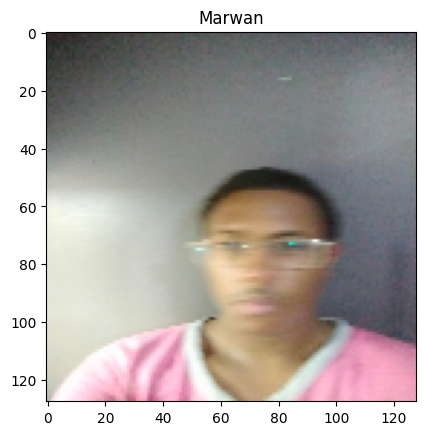

In [63]:
path_img = input()
image = cv2.imread(path_img)
image1 = cv2.resize(image, (128, 128))

image = np.reshape(image1, [1, 128, 128, 3])

predict_x = model.predict(image)
predict_x = predict_x[0]
print(predict_x)
prediction = np.argmax(predict_x)


classes_x = np.argmax(predict_x,axis=0)
print("predict_x------>   " , predict_x[0])
print("classes_x ----->   " , class_name[classes_x])


image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.title(class_name[prediction])
plt.show()

## ==============================================================
## ==============================================================
## ==============================================================
## ==============================================================

## Building RCNN (Connect Model to Computer Vision)

In [ ]:
model = pickle.load(open("D:\Pycharm\model_pickle\DL - Presence and absence Model (experimental).bin", "rb"))
class_name = ["- Marwan -", "- Mostafa -","- Osama -"]

video = cv2.VideoCapture(0)

face_detection = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

while True:
    _, imagenn = video.read()

    face = face_detection.detectMultiScale(imagenn)

    for (x, y, w, h) in face:
        face_only = imagenn[y:y + h, x:x + w]
        cv2.rectangle(imagenn, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(imagenn, "Face", (x, y), 1, 1.3, (0, 0, 255), 2)

        image_pre_new = cv2.resize(imagenn, (128, 128))
        image_pre_new = np.reshape(image_pre_new, [1, 128, 128, 3])
        prediction = model.predict(image_pre_new)

        print(prediction)
        new_prediction = class_name[np.argmax(prediction)]
        print("The Prediction is ==> ", new_prediction)



    cv2.imshow("image", imagenn)

    if cv2.waitKey(1) & 0xff == ord("o"):
        break

video.release()
cv2.destroyAllWindows()